<h1 align="center">7.1 Handling Missing Data

All of the descriptive statistics on pandas objects exclude missing data by default

For numeric data, pandas uses the floating-point value NaN (Not a Number) to represent missing data. We call this a sentinel value

    The built-in Python None value is also treated as NA in object arrays

When  cleaning  up  data  foranalysis, it is often important to do analysis on the missing data itself to identify datacollection problems or potential biases in the data caused by missing data

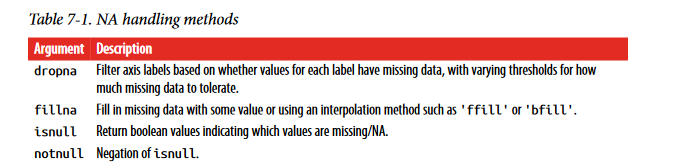

<b>Filtering Out Missing Data

In [1]:
import numpy as np
from numpy import nan as NA
import pandas as pd
data = pd.Series([1, NA, 3.5, NA, 7])

Series

In [2]:
data.dropna() 

0    1.0
2    3.5
4    7.0
dtype: float64

In [3]:
data[~data.isnull()] #boolean indexing

0    1.0
2    3.5
4    7.0
dtype: float64

Dataframe

In [4]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],[NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


 dropna by default dropsany row containing a missing value

In [5]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


Passing how='all' will only drop columns/rows that are all NA

Drop columns by passing axis=1

In [6]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Time Series

In [7]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[1:4, 0] = NA
df

,0,1,2
0,0.801012,NaN,-0.440657
1,NaN,NaN,0.455663
2,NaN,NaN,0.309020
3,NaN,NaN,0.258150
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


In [8]:
df.dropna()

,0,1,2
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


Suppose you  want  to  keep  only  rows  containing  a  certain  number  of  observations. You  can indicate this with the thresh argument

In [9]:
df.dropna(thresh=2)

,0,1,2
0,0.801012,NaN,-0.440657
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


<b>Filling In Missing Data

Rather  than  filtering  out  missing  data  (and  potentially  discarding  other  data  along with  it),  you  may  want  to  fill  in  the  “holes”  in  any  number  of  ways.  

    For  most  pur‐poses,  the  fillna  method  is  the  workhorse  function  to  use.  

    Calling  fillna  with  a constant replaces missing values with that value

In [10]:
df.fillna(0)

,0,1,2
0,0.801012,0.000000,-0.440657
1,0.000000,0.000000,0.455663
2,0.000000,0.000000,0.309020
3,0.000000,0.000000,0.258150
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


Calling fillna with a dict, you can use a different fill value for each column

In [11]:
df.fillna({0: 0.5, 1: 0})

,0,1,2
0,0.801012,0.000000,-0.440657
1,0.500000,0.000000,0.455663
2,0.500000,0.000000,0.309020
3,0.500000,0.000000,0.258150
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


    fillna returns a new object, but you can modify the existing object in-place by passing inplace=True

    The same interpolation methods available for reindexing can be used with fillna

In [12]:
df

,0,1,2
0,0.801012,NaN,-0.440657
1,NaN,NaN,0.455663
2,NaN,NaN,0.309020
3,NaN,NaN,0.258150
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


In [13]:
df.fillna(method='bfill',limit=2)

,0,1,2
0,0.801012,NaN,-0.440657
1,NaN,NaN,0.455663
2,0.243274,0.183959,0.309020
3,0.243274,0.183959,0.258150
4,0.243274,0.183959,-1.947960
5,2.192850,-1.528555,-1.802609
6,-0.951387,-0.497662,0.549475


With fillna you can do lots of other things with a little creativity. For example, youmight pass the mean or median value of a Series
    
    data.fillna(data.mean())

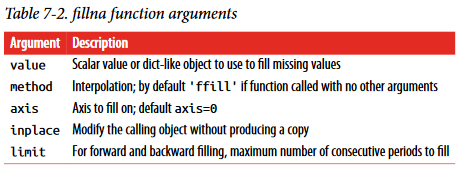